In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip uninstall -y mkl
!pip install --upgrade mxnet-cu100
!pip install autogluon
!pip install -U ipykernel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 41.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.0.4
    Uninstalling pip-22.0.4:
      Successfully uninstalled pip-22.0.4
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Found existing installation: mkl 2019.0
Uninstalling mkl-2019.0:
  Successfully uninstalled mkl-2019.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.0/354.0 MB 3.6 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from autogluon.tabular import TabularPredictor as task
import torch
import numpy as np
from sklearn.model_selection import train_test_split
from google.colab import files
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder

## Load data set
In the following sections you can load the data set you are going to use to test Auto-Keras. The training data is contained in `x_train` and `y_train`, while the test data is in `x_test` and `y_test`.

In [ ]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: ignored

In [ ]:
import pandas as pd
data=pd.read_csv('allNewDataSet.csv')

In [ ]:
# data=data.drop(columns=['AvgCyclomatic','AvgCyclomaticModified','AvgCyclomaticStrict','AvgEssential','AvgLine','AvgLineBlank','AvgLineCode','AvgLineComment','MaxCyclomatic','MaxCyclomaticModified','MaxCyclomaticStrict','MaxEssential','MaxInheritanceTree','MaxNesting'])


In [ ]:
# split into inputs and outputs
from sklearn import preprocessing
lb=preprocessing.LabelEncoder()
lb.fit(data["FEStatus"])
print(lb.classes_)
data["FEStatus"]=lb.transform(data["FEStatus"])


['HIGH' 'LOW' 'MEDIUM' 'NO']


In [ ]:
lbKind=preprocessing.LabelEncoder()
lbKind.fit(data["Kind"])
print(lbKind.classes_)
data["Kind"]=lbKind.transform(data["Kind"])

['Abstract Class' 'Class' 'Enum Type' 'Generic Class' 'Generic Interface'
 'Interface' 'Private Abstract Class' 'Private Class' 'Private Enum Type'
 'Private Interface' 'Private Static Abstract Class'
 'Private Static Abstract Generic Class' 'Private Static Class'
 'Private Static Generic Class' 'Protected Class' 'Protected Interface'
 'Protected Static Abstract Class' 'Protected Static Class'
 'Public Abstract Class' 'Public Abstract Generic Class' 'Public Class'
 'Public Enum Type' 'Public Generic Class' 'Public Generic Interface'
 'Public Interface' 'Public Static Abstract Class' 'Public Static Class'
 'Public Static Generic Class' 'Static Abstract Class' 'Static Class'
 'Static Generic Class']


In [ ]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data))
threshold = 7
print(np.where(z > threshold))
data = data[(z < threshold).all(axis=1)]
data.shape

(array([    0,     0,     0, ..., 16523, 16537, 16537]), array([ 2,  3,  4, ..., 11,  4,  6]))


(15959, 45)

In [ ]:
columns=data.columns
data=data.dropna()

In [ ]:
...
# summarize the class distribution
from collections import Counter
target = data.values[:,-1]
counter = Counter(target)
for k,v in counter.items():
	per = v / len(target) * 100
	print('Class=%s, Count=%d, Percentage=%.3f%%' % (lb.classes_[int(k)], v, per))

Class=HIGH, Count=736, Percentage=4.612%
Class=MEDIUM, Count=1132, Percentage=7.093%
Class=LOW, Count=9058, Percentage=56.758%
Class=NO, Count=5033, Percentage=31.537%


In [ ]:
# evaluate a model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
def evaluate_model(X, y, model):
	# define evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

In [ ]:
label='FEStatus'
#get independant features and dependant variable
X = data.drop([label],axis=1).values   # independant features
y = data[label].values					# dependant variable

In [ ]:
from sklearn.dummy import DummyClassifier
from numpy import mean
from numpy import std
model = DummyClassifier(strategy='most_frequent')
# evaluate the model
scores = evaluate_model(X, y, model)
# summarize performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.568 (0.000)


In [ ]:
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%s, Count=%d, Percentage=%.3f%%' % (lb.classes_[int(k)], v, per))

Class=HIGH, Count=736, Percentage=4.612%
Class=MEDIUM, Count=1132, Percentage=7.093%
Class=LOW, Count=9058, Percentage=56.758%
Class=NO, Count=5033, Percentage=31.537%


In [ ]:
 train, validate, test = np.split(data.sample(frac=1, random_state=42),
                       [int(.80*len(data)), int(.90*len(data))])

In [ ]:
counter = Counter(train[label].values	)
for k,v in counter.items():
	per = v / len(train[label]) * 100
	print('Class=%s, Count=%d, Percentage=%.3f%%' % (lb.classes_[int(k)], v, per))

Class=LOW, Count=7264, Percentage=56.897%
Class=HIGH, Count=596, Percentage=4.668%
Class=NO, Count=4001, Percentage=31.339%
Class=MEDIUM, Count=906, Percentage=7.096%


Class=HIGH, n=7046 (24.611%)
Class=NO, n=7264 (25.373%)
Class=MEDIUM, n=7073 (24.706%)
Class=LOW, n=7246 (25.310%)


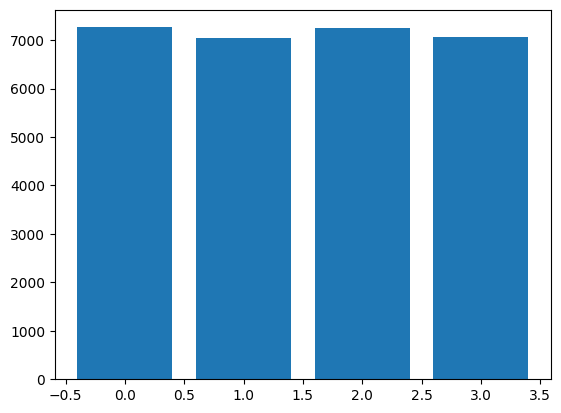

In [ ]:
#   oversampling a multi-class classification dataset
from pandas import read_csv
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import OneHotEncoder
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline
data2 = train.values
# split into input and output elements
X, y = data2[:, :-1], data2[:, -1]
# transform the dataset
oversample = SMOTETomek(tomek=TomekLinks())
X, y = oversample.fit_resample(X, y)
rus = RandomUnderSampler(sampling_strategy={0:2000,1:2000,2:2000,3:2000})
# X, y=rus.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%s, n=%d (%.3f%%)' % (lb.classes_[int(k)-1], v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
#reLabling data
columns2=train.columns
columns2=columns2.delete(44)
X_farme=pd.DataFrame(X,columns=columns2)
train2=pd.concat([X_farme, pd.DataFrame(y)], axis=1, ignore_index=True)
#rename Columns
train2.columns=train.columns

In [ ]:
train2

,Kind,AvgCyclomatic,AvgCyclomaticModified,AvgCyclomaticStrict,AvgEssential,AvgLine,AvgLineBlank,AvgLineCode,AvgLineComment,CountClassBase,...,MaxEssential,MaxInheritanceTree,MaxNesting,PercentLackOfCohesion,RatioCommentToCode,SumCyclomatic,SumCyclomaticModified,SumCyclomaticStrict,SumEssential,FEStatus
0,20.0,3.000000,3.000000,3.000000,2.0,24.000000,2.000000,14.000000,7.000000,1.0,...,12.0,1.000000,3.000000,92.000000,0.470000,135.000000,135.000000,148.000000,80.000000,1.0
1,26.0,2.000000,1.000000,2.000000,1.0,6.000000,0.000000,6.000000,0.000000,2.0,...,3.0,1.000000,2.000000,89.000000,0.030000,49.000000,40.000000,51.000000,27.000000,1.0
2,20.0,2.000000,2.000000,3.000000,1.0,32.000000,7.000000,17.000000,8.000000,1.0,...,1.0,3.000000,2.000000,50.000000,0.550000,4.000000,4.000000,6.000000,2.000000,0.0
3,20.0,3.000000,3.000000,3.000000,1.0,24.000000,0.000000,23.000000,0.000000,2.0,...,7.0,2.000000,3.000000,53.000000,0.030000,39.000000,39.000000,41.000000,21.000000,1.0
4,20.0,6.000000,6.000000,9.000000,1.0,31.000000,1.000000,29.000000,0.000000,1.0,...,3.0,2.000000,4.000000,0.000000,0.060000,41.000000,41.000000,55.000000,8.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28624,20.0,1.000000,1.000000,1.000000,1.0,19.869316,0.688447,15.869316,3.000000,1.0,...,1.0,3.000000,1.000000,0.000000,0.207538,44.507579,44.507579,44.507579,42.507579,3.0
28625,20.0,1.000000,1.000000,1.000000,1.0,5.000000,0.000000,3.000000,2.000000,1.0,...,1.0,2.000000,0.000000,0.000000,0.939746,2.000000,2.000000,2.000000,2.000000,3.0
28626,20.0,2.949816,2.949816,2.949816,1.0,22.749082,2.000000,17.849449,1.899633,1.0,...,3.0,2.050184,1.000000,54.749082,0.191469,8.949816,8.949816,8.949816,5.050184,3.0
28627,20.0,1.157720,1.157720,1.157720,1.0,9.523513,0.315439,9.208074,0.000000,1.0,...,1.0,2.000000,0.157720,39.892635,0.048423,16.684561,16.684561,16.684561,15.265085,3.0


In [ ]:
stats.ks_2samp(test.CountDeclClassMethod, validate.CountDeclClassMethod)


KstestResult(statistic=0.009398496240601503, pvalue=0.9999997708783751, statistic_location=3, statistic_sign=1)

## Create  model


In [ ]:
# from sklearn.utils import class_weight
# class_weights = class_weight.compute_class_weight('balanced',np.unique(y),y)
# print(np.unique(y),class_weights)

In [ ]:
import autogluon.core as ag



In [ ]:
train2

,Kind,AvgCyclomatic,AvgCyclomaticModified,AvgCyclomaticStrict,AvgEssential,AvgLine,AvgLineBlank,AvgLineCode,AvgLineComment,CountClassBase,...,MaxEssential,MaxInheritanceTree,MaxNesting,PercentLackOfCohesion,RatioCommentToCode,SumCyclomatic,SumCyclomaticModified,SumCyclomaticStrict,SumEssential,FEStatus
0,20.0,3.000000,3.000000,3.000000,2.0,24.000000,2.000000,14.000000,7.000000,1.0,...,12.0,1.000000,3.000000,92.000000,0.470000,135.000000,135.000000,148.000000,80.000000,1.0
1,26.0,2.000000,1.000000,2.000000,1.0,6.000000,0.000000,6.000000,0.000000,2.0,...,3.0,1.000000,2.000000,89.000000,0.030000,49.000000,40.000000,51.000000,27.000000,1.0
2,20.0,2.000000,2.000000,3.000000,1.0,32.000000,7.000000,17.000000,8.000000,1.0,...,1.0,3.000000,2.000000,50.000000,0.550000,4.000000,4.000000,6.000000,2.000000,0.0
3,20.0,3.000000,3.000000,3.000000,1.0,24.000000,0.000000,23.000000,0.000000,2.0,...,7.0,2.000000,3.000000,53.000000,0.030000,39.000000,39.000000,41.000000,21.000000,1.0
4,20.0,6.000000,6.000000,9.000000,1.0,31.000000,1.000000,29.000000,0.000000,1.0,...,3.0,2.000000,4.000000,0.000000,0.060000,41.000000,41.000000,55.000000,8.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28624,20.0,1.000000,1.000000,1.000000,1.0,19.869316,0.688447,15.869316,3.000000,1.0,...,1.0,3.000000,1.000000,0.000000,0.207538,44.507579,44.507579,44.507579,42.507579,3.0
28625,20.0,1.000000,1.000000,1.000000,1.0,5.000000,0.000000,3.000000,2.000000,1.0,...,1.0,2.000000,0.000000,0.000000,0.939746,2.000000,2.000000,2.000000,2.000000,3.0
28626,20.0,2.949816,2.949816,2.949816,1.0,22.749082,2.000000,17.849449,1.899633,1.0,...,3.0,2.050184,1.000000,54.749082,0.191469,8.949816,8.949816,8.949816,5.050184,3.0
28627,20.0,1.157720,1.157720,1.157720,1.0,9.523513,0.315439,9.208074,0.000000,1.0,...,1.0,2.000000,0.157720,39.892635,0.048423,16.684561,16.684561,16.684561,15.265085,3.0


In [ ]:
ag.metrics.log_loss

log_loss

In [ ]:
# specify your evaluation metric here metric ='balanced_accuracy_score'
save_path = 'agModels-predictClass2'  # specifies folder to store trained models
metric = 'log_loss'
#
# time_limit='auto'

time_limit = 60*60  # train various models for ~2 min
num_trials = 5  # try at most 5 different hyperparameter configurations for each type of model
search_strategy = 'auto'  # to tune hyperparameters using Bayesian optimization routine with a local scheduler

hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
    'num_trials': num_trials,
    'searcher': search_strategy,
    'output_directory':save_path,
      'scheduler' : 'local'
}
# ,
#  hyperparameters=hyperparameters,time_limit=time_limit,

In [ ]:
predictor = task(label=label, eval_metric=metric,path=save_path).fit(
    train2, tuning_data=validate, time_limit =time_limit,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs
)


Fitted model: NeuralNetTorch/c162af21 ...
	-0.8417	 = Validation score   (-log_loss)
	118.45s	 = Training   runtime
	0.1s	 = Validation runtime
Fitted model: NeuralNetTorch/c1caea98 ...
	-0.7807	 = Validation score   (-log_loss)
	111.83s	 = Training   runtime
	0.26s	 = Validation runtime
Fitted model: NeuralNetTorch/83718491 ...
	-0.8752	 = Validation score   (-log_loss)
	118.81s	 = Training   runtime
	0.28s	 = Validation runtime
Fitted model: NeuralNetTorch/9a1b572f ...
	-0.8118	 = Validation score   (-log_loss)
	116.42s	 = Training   runtime
	0.12s	 = Validation runtime
Fitting model: LightGBMLarge ... Training model for up to 249.14s of the 1900.24s of remaining time.
	-0.6243	 = Validation score   (-log_loss)
	63.05s	 = Training   runtime
	0.42s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.0s of the 1804.15s of remaining time.
	-0.6076	 = Validation score   (-log_loss)
	5.85s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon tr

In [ ]:
predictor = task.load(save_path)


In [ ]:
train_data_nolabel=train2.drop([label], axis=1)
y_train=train2[label];
y_pred = predictor.predict_proba(train_data_nolabel)
print("Predictions:  ", list(y_pred)[:50])
perf = predictor.evaluate_predictions(y_true=y_train, y_pred=y_pred, auxiliary_metrics=True)

Evaluation: log_loss on test data: -0.11881671811250341
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "log_loss": -0.11881671811250341,
    "accuracy": 0.9915121031122288,
    "balanced_accuracy": 0.9914337999652144,
    "mcc": 0.988710180001295
}


Predictions:   [0.0, 1.0, 2.0, 3.0]


In [ ]:
validate_data_nolabel=validate.drop([label], axis=1)
y_validate=validate[label];
y_pred = predictor.predict_proba(validate_data_nolabel)
print("Predictions:  ", list(y_pred)[:50])
perf = predictor.evaluate_predictions(y_true=y_validate, y_pred=y_pred, auxiliary_metrics=True)

Evaluation: log_loss on test data: -0.6069786053251472
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "log_loss": -0.6069786053251472,
    "accuracy": 0.7675438596491229,
    "balanced_accuracy": 0.5648435449853652,
    "mcc": 0.5867422518606703
}


Predictions:   [0.0, 1.0, 2.0, 3.0]


In [ ]:
test_data_nolabel=test.drop([label], axis=1)
y_test=test[label];
y_pred = predictor.predict_proba (test_data_nolabel)
print("Predictions:  ", list(y_pred)[:50])
perf = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

Evaluation: log_loss on test data: -0.6076675219212
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "log_loss": -0.6076675219212,
    "accuracy": 0.7625313283208021,
    "balanced_accuracy": 0.5254900888961346,
    "mcc": 0.5558188489566089
}


Predictions:   [0.0, 1.0, 2.0, 3.0]


In [ ]:
y_pred.head(50)

,0.0,1.0,2.0,3.0
4669,0.000562,0.607037,0.000416,0.391986
6998,0.006904,0.616824,0.004763,0.371509
14156,0.027726,0.513145,0.110391,0.348738
10287,0.000851,0.856630,0.006860,0.135659
5438,0.031888,0.853117,0.015541,0.099453
8868,0.000352,0.833504,0.000838,0.165307
3935,0.235312,0.399717,0.291371,0.073599
4487,0.005460,0.910740,0.005741,0.078058
778,0.004619,0.045183,0.012760,0.937438
3660,0.015407,0.930160,0.003063,0.051369


In [ ]:
y_test.head(50)

4669     1
6998     1
14156    3
10287    1
5438     1
8868     1
3935     1
4487     1
778      0
3660     1
13874    3
5199     1
1083     2
16059    3
15705    3
10778    1
2925     1
5008     1
13765    3
12792    3
15800    3
6610     1
13952    3
6258     1
3803     1
13464    3
5559     1
2187     1
12754    3
13416    3
1347     2
13970    3
13517    3
5226     1
16091    3
13698    3
7079     1
3831     1
6782     1
8949     1
16499    3
14972    3
8396     1
8916     1
8296     1
15418    3
1809     2
609      0
9109     1
8293     1
Name: FEStatus, dtype: int64

              precision    recall  f1-score   support

           0       0.44      0.21      0.29        66
           1       0.77      0.90      0.83       925
           2       0.50      0.31      0.38       114
           3       0.81      0.68      0.74       491

    accuracy                           0.76      1596
   macro avg       0.63      0.53      0.56      1596
weighted avg       0.75      0.76      0.75      1596



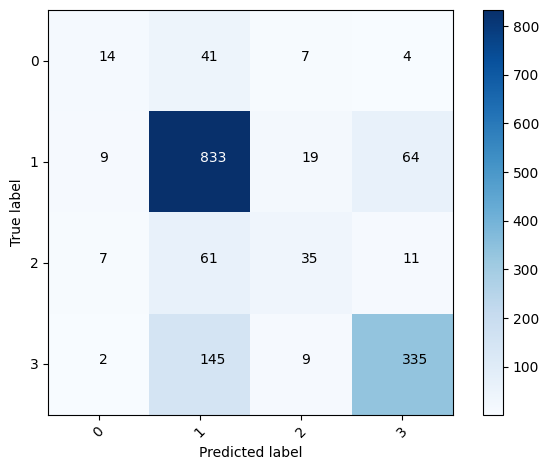

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
"""
Use your classification model to predict some labels
Then, plot confusion matrix and classification report using below code
y_test: real labels
y_pred: predicted model labels
"""
labels = [0,1,2,3]
y_pred2 = predictor.predict (test_data_nolabel)
print(classification_report(y_test, y_pred2)) #classification report from sklearn
cnf_matrix = confusion_matrix(y_test, y_pred2)
plt.imshow(cnf_matrix, cmap=plt.cm.Blues) #plot confusion matrix grid
threshold = cnf_matrix.max() / 2 #threshold to define text color
for i in range(cnf_matrix.shape[0]): #print text in grid
    for j in range(cnf_matrix.shape[1]):
        plt.text(j, i, cnf_matrix[i,j], color="w" if cnf_matrix[i,j] > threshold else 'black')
tick_marks = np.arange(len(labels)) #define labeling spacing based on number of classes
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.colorbar()
plt.tight_layout()

In [ ]:
results = predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                       model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0           RandomForestGini  -0.377393       3.849105   50.211198                3.849105          50.211198            1       True         16
1           RandomForestEntr  -0.377801       3.424982   73.129595                3.424982          73.129595            1       True         17
2             ExtraTreesEntr  -0.387526       2.821411   20.074153                2.821411          20.074153            1       True         20
3             ExtraTreesGini  -0.388258       2.824611   19.325482                2.824611          19.325482            1       True         19
4        WeightedEnsemble_L2  -0.607565      14.324601  732.866796                0.002541           5.846248            2       True         29
5                 XGBoost/T3  -0.621944       8.656362  134.388986  

In [ ]:
# get the best performing model
model = predictor.get_model_best()

In [ ]:
specific_model = predictor._trainer.load_model(model)
model_info=specific_model.get_info
print(model_info)

<bound method StackerEnsembleModel.get_info of <autogluon.core.models.ensemble.weighted_ensemble_model.WeightedEnsembleModel object at 0x7f296e490940>>


In [ ]:
# summarize the loaded model
predictor.leaderboard(test, silent=True).sort_values(by='score_test', ascending=False)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-0.607668,-0.607565,11.703994,14.324601,732.866796,0.011077,0.002541,5.846248,2,True,29
1,LightGBMLarge,-0.615280,-0.624272,0.699735,0.416877,63.048687,0.699735,0.416877,63.048687,1,True,28
2,LightGBM/T4,-0.627060,-0.626606,3.573297,3.770765,144.370487,3.573297,3.770765,144.370487,1,True,15
3,LightGBM/T2,-0.629071,-0.634391,0.202520,0.204945,31.780403,0.202520,0.204945,31.780403,1,True,13
4,LightGBM/T3,-0.629092,-0.634305,0.425870,0.309208,36.787294,0.425870,0.309208,36.787294,1,True,14
5,XGBoost/T3,-0.632507,-0.621944,8.221532,8.656362,134.388986,8.221532,8.656362,134.388986,1,True,23
6,LightGBMXT/T1,-0.633343,-0.640316,1.181017,0.655380,52.378526,1.181017,0.655380,52.378526,1,True,8
7,XGBoost/T1,-0.637504,-0.638346,0.902265,0.679381,52.842139,0.902265,0.679381,52.842139,1,True,21
8,LightGBMXT/T3,-0.637533,-0.637193,1.120306,0.857067,47.787668,1.120306,0.857067,47.787668,1,True,10
9,LightGBMXT/T2,-0.637579,-0.638593,0.524194,0.397706,35.811054,0.524194,0.397706,35.811054,1,True,9


In [ ]:
all_models = predictor.get_model_names()
model_to_use = all_models[0]
specific_model = predictor._trainer.load_model(model_to_use)

# Objects defined below are dicts of various information (not printed here as they are quite large):
model_info = specific_model.get_info()
predictor_information = predictor.info()

In [ ]:
predictor_information

{'path': 'agModels-predictClass2/',
 'label': 'FEStatus',
 'random_state': 0,
 'version': '0.7.0',
 'features': ['Kind',
  'AvgCyclomatic',
  'AvgCyclomaticModified',
  'AvgCyclomaticStrict',
  'AvgEssential',
  'AvgLine',
  'AvgLineBlank',
  'AvgLineCode',
  'AvgLineComment',
  'CountClassBase',
  'CountClassCoupled',
  'CountClassDerived',
  'CountDeclClassMethod',
  'CountDeclClassVariable',
  'CountDeclInstanceMethod',
  'CountDeclInstanceVariable',
  'CountDeclMethod',
  'CountDeclMethodAll',
  'CountDeclMethodDefault',
  'CountDeclMethodPrivate',
  'CountDeclMethodProtected',
  'CountDeclMethodPublic',
  'CountLine',
  'CountLineBlank',
  'CountLineCode',
  'CountLineCodeDecl',
  'CountLineCodeExe',
  'CountLineComment',
  'CountSemicolon',
  'CountStmt',
  'CountStmtDecl',
  'CountStmtExe',
  'MaxCyclomatic',
  'MaxCyclomaticModified',
  'MaxCyclomaticStrict',
  'MaxEssential',
  'MaxInheritanceTree',
  'MaxNesting',
  'PercentLackOfCohesion',
  'RatioCommentToCode',
  'SumCyclo

In [ ]:
feature_importance=predictor.feature_importance(test,subsample_size=1000)

Computing feature importance via permutation shuffling for 44 features using 1000 rows with 5 shuffle sets...
	1114.36s	= Expected runtime (222.87s per shuffle set)
	1113.84s	= Actual runtime (Completed 5 of 5 shuffle sets)


In [ ]:
feature_importance.head(20)

,importance,stddev,p_value,n,p99_high,p99_low
CountClassCoupled,0.272157,0.015168,1.152881e-06,5,0.303388,0.240927
AvgLineCode,0.065244,0.003130,6.337289e-07,5,0.071689,0.058800
CountDeclMethodAll,0.064135,0.012103,1.452415e-04,5,0.089056,0.039214
MaxInheritanceTree,0.052846,0.003387,2.013377e-06,5,0.059819,0.045872
CountStmtExe,0.035171,0.010078,7.276630e-04,5,0.055922,0.014419
CountDeclInstanceVariable,0.030513,0.007055,3.197886e-04,5,0.045039,0.015987
CountLineCode,0.025395,0.008629,1.380121e-03,5,0.043162,0.007628
CountLineBlank,0.018532,0.006819,1.852450e-03,5,0.032571,0.004492
Kind,0.017255,0.004992,7.546235e-04,5,0.027534,0.006976
CountLineCodeDecl,0.014792,0.002791,1.450806e-04,5,0.020539,0.009046


In [ ]:
# Save and download model
import os
print(os.listdir("."))



['.config', 'dst.zip', 'freecolِAfterRefactoringPredicted.csv', 'allNewDataSet.csv', 'agModels-predictClass2', '.ipynb_checkpoints', 'freecolِAfterRefactoring.csv', 'freecellData.csv', 'sample_data']


### Export model
You can export the model for later training.

In [ ]:
import zipfile

def zip(src, dst):
    zf = zipfile.ZipFile("%s.zip" % (dst), "w", zipfile.ZIP_DEFLATED)
    abs_src = os.path.abspath(src)
    for dirname, subdirs, files in os.walk(src):
        for filename in files:
            absname = os.path.abspath(os.path.join(dirname, filename))
            arcname = absname[len(abs_src) + 1:]
            print ('zipping %s as %s' % (os.path.join(dirname, filename),
                                        arcname))
            zf.write(absname, arcname)
    zf.close()

zip(save_path, "./dst")


zipping agModels-predictClass2/metadata.json as metadata.json
zipping agModels-predictClass2/__version__ as __version__
zipping agModels-predictClass2/predictor.pkl as predictor.pkl
zipping agModels-predictClass2/learner.pkl as learner.pkl
zipping agModels-predictClass2/SummaryOfModels.html as SummaryOfModels.html
zipping agModels-predictClass2/utils/attr/KNeighborsUnif/y_pred_proba_val.pkl as utils/attr/KNeighborsUnif/y_pred_proba_val.pkl
zipping agModels-predictClass2/utils/attr/KNeighborsDist/y_pred_proba_val.pkl as utils/attr/KNeighborsDist/y_pred_proba_val.pkl
zipping agModels-predictClass2/utils/attr/LightGBMLarge/y_pred_proba_val.pkl as utils/attr/LightGBMLarge/y_pred_proba_val.pkl
zipping agModels-predictClass2/utils/attr/NeuralNetFastAI/y_pred_proba_val.pkl as utils/attr/NeuralNetFastAI/y_pred_proba_val.pkl
zipping agModels-predictClass2/utils/data/X.pkl as utils/data/X.pkl
zipping agModels-predictClass2/utils/data/X_val.pkl as utils/data/X_val.pkl
zipping agModels-predictClas

In [ ]:
files.download("./dst.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **testing**


In [ ]:
uploaded2 = files.upload()
new_system_data=pd.read_csv('freecollall.csv')
new_system_data["Kind"]=lbKind.transform(new_system_data["Kind"])
new_system_y_pred = predictor.predict(new_system_data)
new_system_data["FEStatus"]=new_system_y_pred
new_system_data.to_csv("freecellPredicted.csv", index=False)
files.download("freecellPredicted.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
uploaded3 = files.upload()
new_system_data=pd.read_csv('freecolِAfterRefactoring.csv')
new_system_data["Kind"]=lbKind.transform(new_system_data["Kind"])
new_system_y_pred = predictor.predict(new_system_data)
new_system_data["FEStatus"]=new_system_y_pred
new_system_data.to_csv("freecolِAfterRefactoringPredicted.csv", index=False)
files.download("freecolِAfterRefactoringPredicted.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Load model
Note that when loading a model, the class of `clf` changes to `PortableImageSupervised`.

Subsequently use [this website](https://lutzroeder.github.io/netron/) to visualize the model.